# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as mlt
import numpy as np

# Data Ingestion

In [2]:

dataset1=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

dataset1.sample(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4264,8818-DOPVL,Female,1,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.45,4863.85,No
3175,7395-IGJOS,Male,1,Yes,No,17,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),81.50,1329.2,Yes
563,6103-LIANB,Male,0,Yes,Yes,59,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),99.50,5861.75,No
220,9408-SSNVZ,Female,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,268.35,Yes
5940,9711-FJTBX,Male,0,Yes,Yes,56,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,One year,Yes,Mailed check,85.85,4793.8,No


In [3]:
dataset1.drop_duplicates(inplace=True)

# Data Cleaning

In [4]:
dataset1.drop('customerID',axis='columns',inplace=True)

In [5]:
dataset1.drop_duplicates(inplace=True)

In [6]:
dataset1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
pd.to_numeric(dataset1.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7021, dtype: float64

In [8]:
dataset1.TotalCharges.describe()

count     7021
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [9]:
dataset1.shape

(7021, 20)

In [10]:
dataset1[pd.to_numeric(dataset1.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
dataset1.shape

(7021, 20)

In [12]:
dataset2=dataset1[dataset1.TotalCharges!=' ']
dataset2.shape

(7010, 20)

In [13]:
dataset2.TotalCharges=pd.to_numeric(dataset2.TotalCharges)

C:\Users\hp 1\AppData\Local\Temp\ipykernel_2792\2081488761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.TotalCharges=pd.to_numeric(dataset2.TotalCharges)


In [14]:
dataset2.TotalCharges.dtypes

dtype('float64')

# Data Visualization

## Customer leaving wrt tenure

In [15]:
Tenure_and_No=dataset2[dataset2.Churn=='No'].tenure
Tenure_and_Yes=dataset2[dataset2.Churn=='Yes'].tenure

Text(0.5, 1.0, 'CUSTOMER CHURN wrt TENURE')

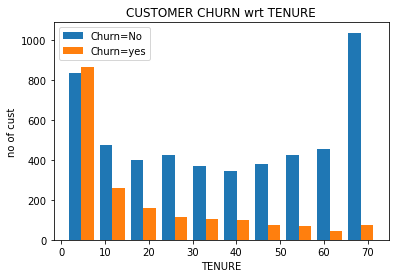

In [16]:
mlt.hist([Tenure_and_No,Tenure_and_Yes],label=['Churn=No','Churn=yes'])
mlt.legend()
mlt.ylabel('no of cust')
mlt.xlabel('TENURE')
mlt.title('CUSTOMER CHURN wrt TENURE')

In [17]:
mc_and_No=dataset2[dataset2.Churn=='No'].MonthlyCharges
mc_and_Yes=dataset2[dataset2.Churn=='Yes'].MonthlyCharges

Text(0.5, 1.0, 'CUSTOMER CHURN wrt TENURE')

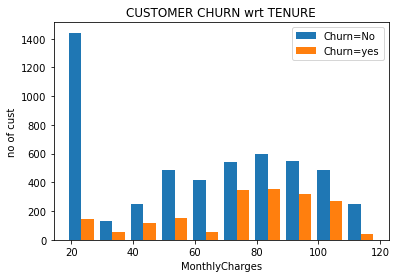

In [18]:
mlt.hist([mc_and_No,mc_and_Yes],label=['Churn=No','Churn=yes'])
mlt.legend()
mlt.ylabel('no of cust')
mlt.xlabel('MonthlyCharges')
mlt.title('CUSTOMER CHURN wrt TENURE')

# Feature Engg.

In [19]:
for column in dataset2:
    if dataset2[column].dtypes=='object':
        print(f'{column}:{dataset2[column].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [20]:
dataset2.replace('No phone service','No',inplace=True)
dataset2.replace('No internet service','No',inplace=True)

C:\Users\hp 1\AppData\Local\Temp\ipykernel_2792\3471670931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.replace('No phone service','No',inplace=True)
C:\Users\hp 1\AppData\Local\Temp\ipykernel_2792\3471670931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.replace('No internet service','No',inplace=True)


In [21]:
for column in dataset2:
    if dataset2[column].dtypes=='object':
        print(f'{column}:{dataset2[column].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [22]:
yes_no=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [23]:
dataset2.replace('Yes',1,inplace=True)

C:\Users\hp 1\AppData\Local\Temp\ipykernel_2792\3114132139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.replace('Yes',1,inplace=True)


In [24]:
dataset2.replace('No',0,inplace=True)

C:\Users\hp 1\AppData\Local\Temp\ipykernel_2792\3034036266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.replace('No',0,inplace=True)


In [25]:
for column in dataset2:
    
        print(f'{column}:{dataset2[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [26]:
dataset2.replace({'Female':1,'Male':0},inplace=True)

C:\Users\hp 1\AppData\Local\Temp\ipykernel_2792\795245302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.replace({'Female':1,'Male':0},inplace=True)


In [27]:
for column in dataset2:
    
        print(f'{column}:{dataset2[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [28]:
dataset3=pd.get_dummies(data=dataset2,columns=['InternetService','Contract','PaymentMethod'])

In [29]:
dataset3.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2036,0,1,1,0,1,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1547,1,0,1,0,63,1,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
902,0,0,0,0,17,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [30]:
dataset3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [31]:
#scaling the data

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset3[cols_to_scale] = scaler.fit_transform(dataset3[cols_to_scale])

In [33]:
for column in dataset3:
    
        print(f'{column}:{dataset3[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

# Train Test Split

In [34]:
X=dataset3.drop('Churn',axis='columns')
Y=dataset3.Churn

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=69)

In [36]:
X_train.shape

(5958, 26)

In [37]:
X_test.shape

(1052, 26)

# Modeling

In [38]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'), 
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(X_train,Y_train,epochs=50)

Epoch 1/50
187/187 [==============================] - 1s 2ms/step - loss: 0.4948 - accuracy: 0.7625
Epoch 2/50
187/187 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.7924
Epoch 3/50
187/187 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.7961
Epoch 4/50
187/187 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8003
Epoch 5/50
187/187 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8014
Epoch 6/50
187/187 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8072
Epoch 7/50
187/187 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8041
Epoch 8/50
187/187 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8090
Epoch 9/50
187/187 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8077
Epoch 10/50
187/187 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8113

In [40]:
model.evaluate(X_test,Y_test)

33/33 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7747


[0.4756121039390564, 0.7747148275375366]

In [41]:
PrED=model.predict(X_test)
PrED[:5]

33/33 [==============================] - 0s 2ms/step


array([[0.24922627],
       [0.21683717],
       [0.00875512],
       [0.2806652 ],
       [0.07840933]], dtype=float32)

In [42]:
Y_pred=[]
for elements in PrED:
    if elements > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)

In [43]:
Y_pred[:5]

[0, 0, 0, 0, 0]

In [44]:
Y_test[:5]

600     0
1883    1
2227    0
6576    0
2556    0
Name: Churn, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       776
           1       0.57      0.56      0.57       276

    accuracy                           0.77      1052
   macro avg       0.71      0.70      0.71      1052
weighted avg       0.77      0.77      0.77      1052

